In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data


In [3]:
df = pd.read_csv('salary-data-clean.csv')
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary,company_txt,job_state,age,python,R,spark,aws,cloud,excel
0,Data Scientist 2,$52K-$95K,Description\nDigital Health and Analytics with...,3.9,Humana\n3.9,"Louisville, KY",-1,10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),-1,52,95,73.5,Humana,KY,59,1,0,1,0,0,0
1,Data Scientist,$58K-$103K,Job Posting End Date: 12/24\nUnum is a company...,3.9,Unum\n3.9,"Portland, ME",-1,5001 to 10000 Employees,1848,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),-1,58,103,80.5,Unum,ME,172,0,0,0,0,0,0
2,Data Scientist,$87K-$142K,"At Farm Credit Mid-America, we believe people ...",4.1,Farm Credit Mid-America\n4.1,"Louisville, KY",-1,1001 to 5000 Employees,1985,Company - Private,Lending,Finance,$100 to $500 million (USD),-1,87,142,114.5,Farm Credit Mid-America,KY,35,0,0,0,0,0,0
3,Data Scientist,$98K-$165K,Tradeweb is looking to add a Data Scientist to...,4.4,Tradeweb Markets LLC\n4.4,"New York, NY",-1,501 to 1000 Employees,1997,Company - Public,Financial Transaction Processing,Finance,Unknown / Non-Applicable,-1,98,165,131.5,Tradeweb Markets LLC,NY,23,1,0,0,0,0,0
4,Data Scientist,$100K-$160K,Are you passionate about providing real impact...,4.6,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",-1,5001 to 10000 Employees,1942,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1,100,160,130.0,Johns Hopkins Applied Physics Laboratory (APL),MD,78,1,0,0,0,0,0


In [4]:
cols_to_drop = df.loc[:, (df == -1).all() | (df == 0).all()]
#df.drop(cols_to_drop.columns, axis=1, inplace=True)
df.drop(cols_to_drop, inplace=True, axis=1)

## Extra Data Cleaning
Here we fix the title of the jobs, we also add a column name *seniority* that shows whether the job title is senior or not. Further, we do some data cleaning on job state and fix its problems. 

In [5]:
def fix_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'snr' in title.lower() or 'sr' in title.lower() or 'manager' in title.lower() or\
    'director' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'
    
def fix_state(state):
    state = state.strip().lower()
    if 'arapahoe' in state:
        return 'CO'
    elif 'texas' in state:
        return 'TX'
    elif 'california' in state:
        return 'CA'
    elif 'cuyahoga' in state:
        return 'OH'
    elif 'new jersey' in state:
        return 'NJ'
    elif 'new york' in state:
        return 'NY'
    elif 'florida' in state:
        return 'FL'
    elif 'illinois' in state:
        return 'IL'
    elif 'arizona' in state:
        return 'AZ'
    elif 'tennessee' in state:
        return 'TN'
    elif 'virginia' in state:
        return 'VA'
    else:
        return state
    
        

In [6]:
df['job_title'] = df['job title'].apply(fix_title)
df['job_title'].value_counts()

data scientist    997
Name: job_title, dtype: int64

In [7]:
df['seniority'] = df['job title'].apply(seniority)
df['seniority'].value_counts()

na        926
senior     68
junior      3
Name: seniority, dtype: int64

In [8]:
df['state'] = df['job_state'].apply(fix_state)

We now drop the extra columns

In [9]:
df.drop('job title', axis=1, inplace=True)
df.drop('job_state', axis=1, inplace=True)

We find the length of job description for each job.

In [10]:
df['desc_len'] = df['job description'].apply(lambda x: len(x))
df['desc_len']

0      3525
1      5564
2      6569
3      2944
4      2923
       ... 
992    1503
993    4520
994    4973
995    1897
996    4908
Name: desc_len, Length: 997, dtype: int64

Remove the new line character from company_txt

## EDA

In [11]:
df.describe()

,rating,founded,min_salary,max_salary,avg_salary,age,python,R,spark,aws,cloud,desc_len
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,3.050853,1404.235707,77.486459,128.106319,102.796389,27.619860,0.817452,0.004012,0.254764,0.235707,0.269809,3555.474423
std,1.882778,901.274063,19.319057,28.587580,23.865002,42.814592,0.386489,0.063245,0.435947,0.424653,0.444083,1510.311395
min,-1.000000,-1.000000,52.000000,93.000000,73.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,535.000000
25%,3.200000,-1.000000,65.000000,106.000000,85.500000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
50%,3.700000,1978.000000,69.000000,119.000000,94.500000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3379.000000
75%,4.100000,2006.000000,90.000000,149.000000,120.500000,35.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4615.000000
max,5.000000,2020.000000,135.000000,212.000000,173.500000,238.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12240.000000


We want to see the histogram of our numerical variables.

In [12]:
df.columns

Index(['salary estimate', 'job description', 'rating', 'company name',
       'location', 'size', 'founded', 'type of ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'cloud',
       'job_title', 'seniority', 'state', 'desc_len'],
      dtype='object')

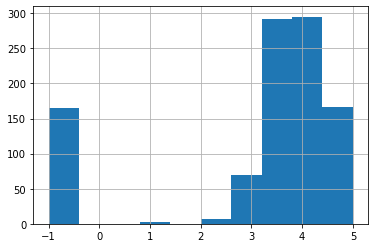

In [13]:
df['rating'].hist();

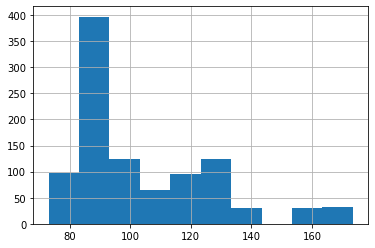

In [14]:
df['avg_salary'].hist(bins=10);

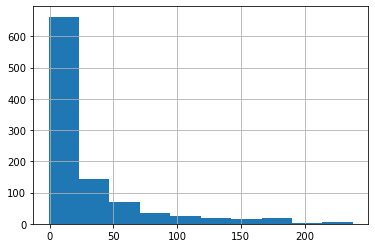

In [15]:
df['age'].hist();

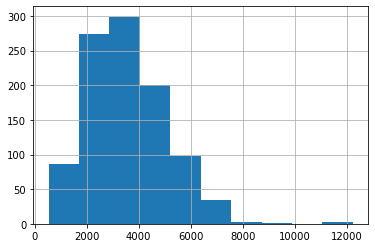

In [16]:
df['desc_len'].hist();

We can also use boxplot to see the distribution of numerical variables.

<AxesSubplot:>

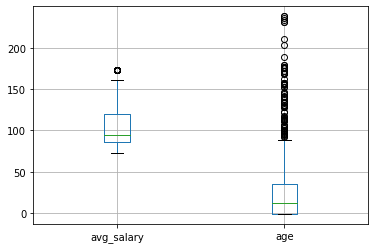

In [17]:
df.boxplot(column=['avg_salary', 'age'])

<AxesSubplot:>

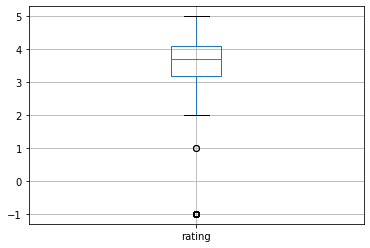

In [18]:
df.boxplot(column='rating')

We now take a look at correlations between numerical variables.

In [19]:
corr = df[['avg_salary', 'age', 'rating', 'desc_len']].corr()
corr

,avg_salary,age,rating,desc_len
avg_salary,1.000000,0.014625,0.084944,0.048649
age,0.014625,1.000000,0.252637,0.229461
rating,0.084944,0.252637,1.000000,0.182762
desc_len,0.048649,0.229461,0.182762,1.000000


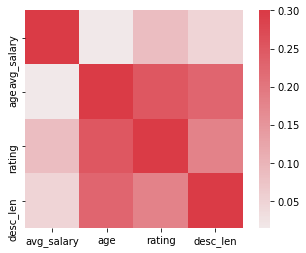

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = cmap, vmax=.3, center=0, square=True);

The above chart shows that there is relatively high correlation between *rating* and 'age', also between 'desc_len' and 'age'. 

Now we visualize categorical variables.

graph for size, total=9


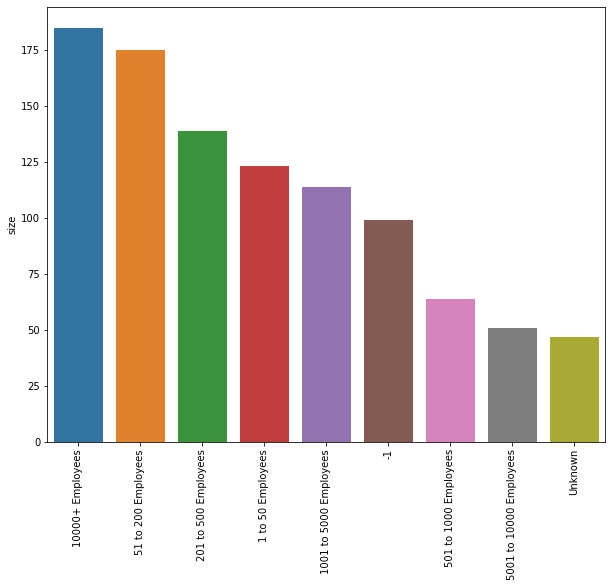

graph for type of ownership, total=13


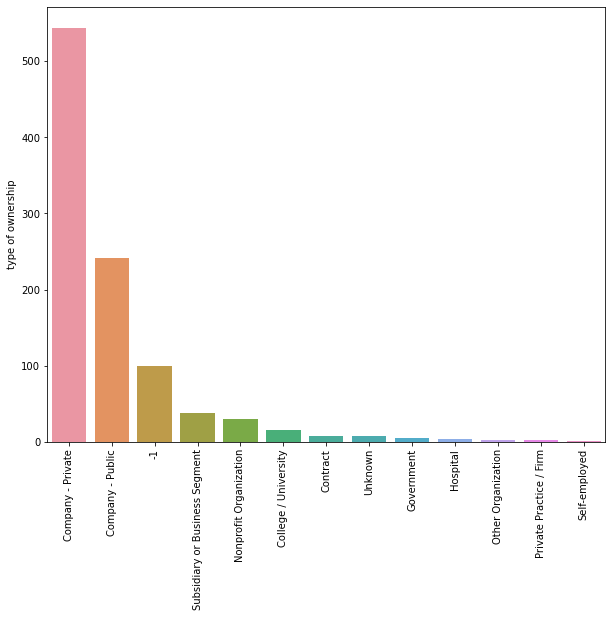

graph for sector, total=22


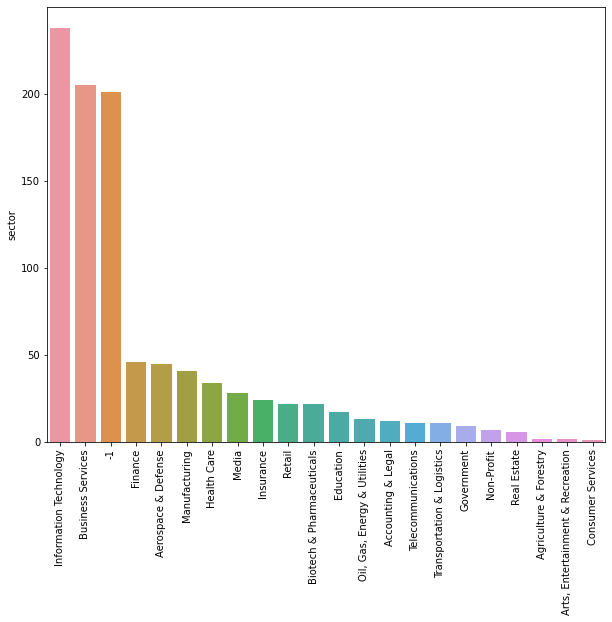

graph for seniority, total=3


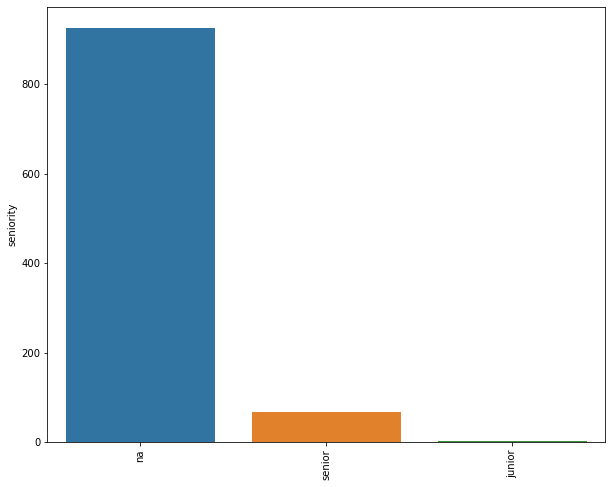

graph for state, total=52


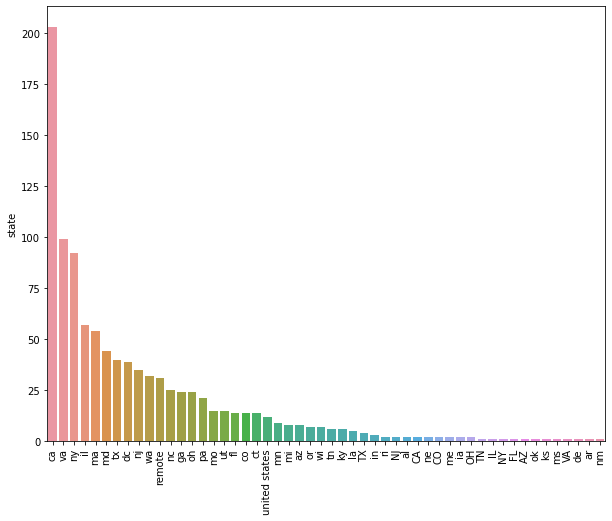

In [21]:
df_cat = df[['size', 'type of ownership', 'sector', 'seniority', 'state']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

For better visualisation in high-dimensional variables, we select top 20 variables and visualise those variables.

graph for company_txt, total=20


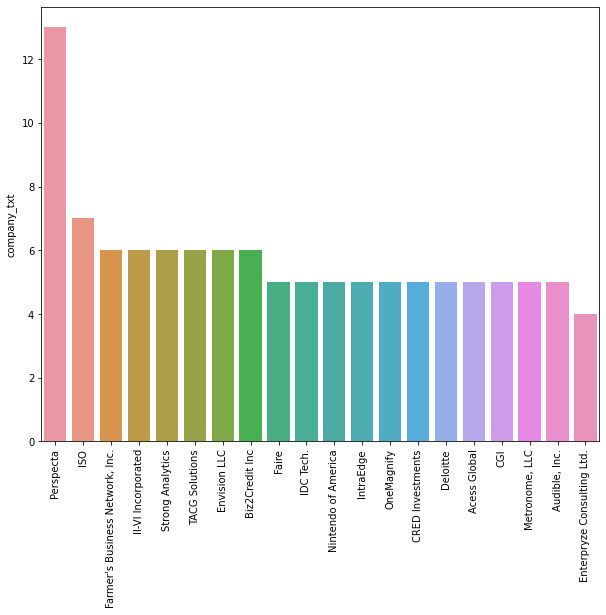

graph for location, total=20


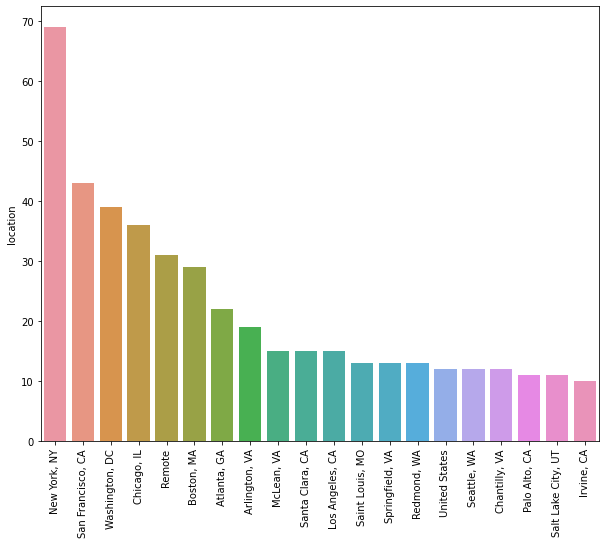

In [22]:
df_cat = df[['company_txt', 'location']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()[:20]
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
df.columns

Index(['salary estimate', 'job description', 'rating', 'company name',
       'location', 'size', 'founded', 'type of ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'cloud',
       'job_title', 'seniority', 'state', 'desc_len'],
      dtype='object')

In [24]:
pd.pivot_table(index = ['state'], values='avg_salary', data=df).sort_values('avg_salary', ascending=False)[:5]

,avg_salary
state,
de,173.50
TN,156.00
ms,127.00
NJ,120.25
CA,116.50


In [25]:
df.columns

Index(['salary estimate', 'job description', 'rating', 'company name',
       'location', 'size', 'founded', 'type of ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'cloud',
       'job_title', 'seniority', 'state', 'desc_len'],
      dtype='object')

In [26]:
df_pivots = df[['rating', 'industry', 'sector', 'revenue', 'python', 'R', 
                'spark', 'aws', 'cloud', 'type of ownership', 'avg_salary']]

for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values(by='avg_salary', ascending=False))

rating
        avg_salary
rating            
 2.8    135.750000
 2.0    110.250000
 2.9    109.450000
 5.0    109.104651
 3.5    108.793478
 3.8    108.370690
 3.0    108.100000
 4.1    106.794118
 3.2    106.750000
 4.0    105.654545
 4.7    105.020000
 2.6    104.500000
 3.3    104.324324
 4.2    104.088889
 3.6    103.840278
 4.3    103.540541
 4.8    102.678571
 3.1    102.421053
 2.3    102.250000
 4.4    101.844828
 3.7    100.472727
 4.6    100.105263
 4.5     98.703704
 3.4     98.210000
-1.0     98.078788
 3.9     97.257576
 4.9     96.666667
 2.7     91.227273
 2.5     89.333333
 1.0     86.750000
industry
                                     avg_salary
industry                                       
Food & Beverage Manufacturing        173.500000
Media & Entertainment Retail Stores  173.500000
Shipping                             173.500000
News Outlet                          150.333333
Food & Beverage Stores               135.000000
...                                     

In [27]:
pd.pivot_table(df_pivots, index='revenue', columns=['python'], values=['avg_salary'], aggfunc='count')

avg_salary     
python                                    0    1
revenue                                         
$1 to $2 billion (USD)                   13   30
$1 to $5 million (USD)                    5   30
$10 to $25 million (USD)                 13   37
$10+ billion (USD)                       17   94
$100 to $500 million (USD)               18   63
$2 to $5 billion (USD)                    6   33
$25 to $50 million (USD)                  9   40
$5 to $10 billion (USD)                   3   21
$5 to $10 million (USD)                   5   25
$50 to $100 million (USD)                 3   39
$500 million to $1 billion (USD)         10   24
-1                                       15   84
Less than $1 million (USD)               17  112
Unknown / Non-Applicable                 48  183

In [28]:
df

,salary estimate,job description,rating,company name,location,size,founded,type of ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,company_txt,age,python,R,spark,aws,cloud,job_title,seniority,state,desc_len
0,$52K-$95K,Description\nDigital Health and Analytics with...,3.9,Humana\n3.9,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,Humana,59,1,0,1,0,0,data scientist,na,ky,3525
1,$58K-$103K,Job Posting End Date: 12/24\nUnum is a company...,3.9,Unum\n3.9,"Portland, ME",5001 to 10000 Employees,1848,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),58,103,80.5,Unum,172,0,0,0,0,0,data scientist,na,me,5564
2,$87K-$142K,"At Farm Credit Mid-America, we believe people ...",4.1,Farm Credit Mid-America\n4.1,"Louisville, KY",1001 to 5000 Employees,1985,Company - Private,Lending,Finance,$100 to $500 million (USD),87,142,114.5,Farm Credit Mid-America,35,0,0,0,0,0,data scientist,na,ky,6569
3,$98K-$165K,Tradeweb is looking to add a Data Scientist to...,4.4,Tradeweb Markets LLC\n4.4,"New York, NY",501 to 1000 Employees,1997,Company - Public,Financial Transaction Processing,Finance,Unknown / Non-Applicable,98,165,131.5,Tradeweb Markets LLC,23,1,0,0,0,0,data scientist,na,ny,2944
4,$100K-$160K,Are you passionate about providing real impact...,4.6,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",5001 to 10000 Employees,1942,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),100,160,130.0,Johns Hopkins Applied Physics Laboratory (APL),78,1,0,0,0,0,data scientist,na,md,2923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,$65K-$106K,"Data Scientist\nSan Francisco, St. Louis, Seat...",4.5,Envision LLC\n4.5,"Saint Louis, MO",201 to 500 Employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),65,106,85.5,Envision LLC,26,1,0,1,0,0,data scientist,na,mo,1503
993,$65K-$106K,Data Scientist\n\nJob Details\nLevel\nExperien...,4.0,Advanced Cell Diagnostics\n4.0,"Newark, CA",51 to 200 Employees,-1,Company - Private,Advertising & Marketing,Business Services,$5 to $10 million (USD),65,106,85.5,Advanced Cell Diagnostics,-1,1,0,1,1,1,data scientist,na,ca,4520
994,$65K-$106K,This position is responsible for business cons...,3.6,CGI\n3.6,"Lafayette, LA",10000+ Employees,1976,Company - Public,Consulting,Business Services,$10+ billion (USD),65,106,85.5,CGI,44,1,0,0,0,0,data scientist,na,la,4973
995,$65K-$106K,"Data Scientist\n10558\nPhoenix, AZ\n2/11/2020 ...",4.0,IntraEdge\n4.0,"Phoenix, AZ",501 to 1000 Employees,2002,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),65,106,85.5,IntraEdge,18,1,0,1,0,0,data scientist,na,az,1897


In [29]:
df.to_csv('eda_data.csv')